# Mari kita belajar pasal tokenization dari Andrej Kaparthy

The man, the sifu himself. Andrej Kaparthy 

Anda semua boleh tonton tutorial ni sendiri kat YouTube Andrej Kaparthy
https://youtu.be/zduSFxRajkE?si=3yHjRRul9Vqqe8Kx

Tapi kalau nak dalam bahasa Melayu, boleh ikut langkah-langkah dalam notebook ni.

## Apa tu Tokenization

Sebelum kita menyelam ke dalam dasar yang tenggelam, seeloknya kita fahamkan dulu definisi tokenization tu dulu. Tokenization ni sebenarnya adalah cara untuk menukarkan perkataan, mana-mana perkataan dari teks ke dalam bentuk nombor. Sebab komputer ni, mesin ni, dia faham perkataan. Lebih-lebih lagi model-model AI macam GPT. Mereka tak faham huruf, tak faham perkataan. Mereka bekerja dengan nombor, dengan matematik. Jadi kita kena tukarkan semua perkataan kepada nombor.Supaya ia boleh diproses oleh model AI.

Tapi kita tak boleh tukar nombor sebarangan. Ada caranya. Ada langkahnya yang perlu diikut. Dan kat sinilah kita akan cuba tengok apa langkah-langkahnya untuk menukar perkataan kepada nombor.

## Kenapa perlu tokenization?

Kalau siapa yang tahu pasal sains komputer pasti akan sedar yang sebenarnya memang selama ni perkataan memang sudahpun diproses oleh komputer melalui nombor.Ada banyak kod-kod yang digunakan, antaranya

1. Unicode standard
2. ASCII standard

Dan semua ini adalah langkah yang biasa digunakan oleh saitis komputer untuk memproses perkataan. Cuma masalahnya, kod-kod yang digunakan ini adalah pada tahap karakter (huruf), bukan pada tahap perkataan. Model AI hendak memproses perkataan, ayat, yang sangat banyak jumlahnya. Jadi menggunakan kod yang menukarkan perkataan pada tahap huruf merupakan sesuatu yang tidak praktikal.

### Sedikit tentang Unicode standard

Kenapa unicode standard tak sesuai untuk model AI

In [1]:
# contoh menggunakan unicode

string = "Saya tak suka baju melayu Elrah 😡"

[ord(s) for s in string]

[83,
 97,
 121,
 97,
 32,
 116,
 97,
 107,
 32,
 115,
 117,
 107,
 97,
 32,
 98,
 97,
 106,
 117,
 32,
 109,
 101,
 108,
 97,
 121,
 117,
 32,
 69,
 108,
 114,
 97,
 104,
 32,
 128545]

Kau orang semua boleh nampak tak? Macam mana satu ayat yang pendek boleh menjadi satu senarai yang sangat panjang. Jadi sangatlah tak praktikal untuk menggunakan unicode standard bila hendak memproses perkataan dalam model AI.
(Juga perhatikan bahawa unicode juga mengambil kira emoji)

Unicode merupakan standard yang menggunakan UTF (unicode transformation format) encoding. Ada 3 jenis encoding,
1. UTF-8
2. UTF-16
3. UTF-32

Setiap satunya ada kelebihan dan kekurangannya. Contoh di bawah,

In [2]:
#UTF-8
list(string.encode("utf-8"))

[83,
 97,
 121,
 97,
 32,
 116,
 97,
 107,
 32,
 115,
 117,
 107,
 97,
 32,
 98,
 97,
 106,
 117,
 32,
 109,
 101,
 108,
 97,
 121,
 117,
 32,
 69,
 108,
 114,
 97,
 104,
 32,
 240,
 159,
 152,
 161]

In [3]:
#utf-16
list(string.encode("utf-16"))

[255,
 254,
 83,
 0,
 97,
 0,
 121,
 0,
 97,
 0,
 32,
 0,
 116,
 0,
 97,
 0,
 107,
 0,
 32,
 0,
 115,
 0,
 117,
 0,
 107,
 0,
 97,
 0,
 32,
 0,
 98,
 0,
 97,
 0,
 106,
 0,
 117,
 0,
 32,
 0,
 109,
 0,
 101,
 0,
 108,
 0,
 97,
 0,
 121,
 0,
 117,
 0,
 32,
 0,
 69,
 0,
 108,
 0,
 114,
 0,
 97,
 0,
 104,
 0,
 32,
 0,
 61,
 216,
 33,
 222]

In [4]:
#utf-32
list(string.encode("utf-32"))

[255,
 254,
 0,
 0,
 83,
 0,
 0,
 0,
 97,
 0,
 0,
 0,
 121,
 0,
 0,
 0,
 97,
 0,
 0,
 0,
 32,
 0,
 0,
 0,
 116,
 0,
 0,
 0,
 97,
 0,
 0,
 0,
 107,
 0,
 0,
 0,
 32,
 0,
 0,
 0,
 115,
 0,
 0,
 0,
 117,
 0,
 0,
 0,
 107,
 0,
 0,
 0,
 97,
 0,
 0,
 0,
 32,
 0,
 0,
 0,
 98,
 0,
 0,
 0,
 97,
 0,
 0,
 0,
 106,
 0,
 0,
 0,
 117,
 0,
 0,
 0,
 32,
 0,
 0,
 0,
 109,
 0,
 0,
 0,
 101,
 0,
 0,
 0,
 108,
 0,
 0,
 0,
 97,
 0,
 0,
 0,
 121,
 0,
 0,
 0,
 117,
 0,
 0,
 0,
 32,
 0,
 0,
 0,
 69,
 0,
 0,
 0,
 108,
 0,
 0,
 0,
 114,
 0,
 0,
 0,
 97,
 0,
 0,
 0,
 104,
 0,
 0,
 0,
 32,
 0,
 0,
 0,
 33,
 246,
 1,
 0]

Kita boleh nampak kat sini, yang menggunakan UTF-8 sebenarnya lebih efisyen dan lebih menjimatkan ruang. Tapi, secara keseluruhannya, menggunakan UTF-8 encoding adalah sangat tak sesuai untuk model AI memproses bahasa. Kerana itulah, OpenAI memperkenalkan Byte-pair encoidng

## Byte Pair Encoding (BPE) dari Open AI

Konsep Byte Pair Encoding ini secara teorinya akan mengurangkan jumlah byte yang perlu diproses oleh model AI. Algoritmanya adalah seperti di bawah:

1. Katakanlah kita ada satu senarai perkataan yang kita nak encode ("aaabaaadaaac"). Boleh lihat ada 12 karakter/huruf yang perlu diencod
2. Kita akan cari dalam perkataan ini apakah pasangan yang paling banyak berulang, dalam kes ini "aa" yang berulang sebanyak tiga kali
3. Yang berulang ini kita akan gantikan dengan huruf lain ("z")
4. Dengan menggunakan cara ini perkataan itu sudah ditokenkan menjadi "zabzadzac". Sekarang tinggal sahaja karakter.
5. Kita akan ulang sehinggalah tiada lagi pasangan yang berulang.

Contoh penggunaannya adalah seperti di bawah:

In [5]:
#teks boleh diambil di laman sesawang the patriots asia. anda boleh cari list sendiri

teks = "Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪!Kinkyū Jishin Sokuhō (緊急地震速報) ialah amaran yang dikeluarkan lepas gempa bumi dikesan oleh Agensi Meteorologi Jepun (JMA) kepada orang awam untuk berlindung."
tokens = teks.encode("utf-8")
tokens = list(map(int, tokens)) # tukarkan list kepada integer dalam range ..255 untuk memudahkan pemahaman
print('---')
print(teks)
print("length:", len(teks))
print('---')
print(tokens)
print("length:", len(tokens))


---
Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪!Kinkyū Jishin Sokuhō (緊急地震速報) ialah amaran yang dikeluarkan lepas gempa bumi dikesan oleh Agensi Meteorologi Jepun (JMA) kepada orang awam untuk berlindung.
length: 188
---
[239, 188, 181, 239, 189, 142, 239, 189, 137, 239, 189, 131, 239, 189, 143, 239, 189, 132, 239, 189, 133, 33, 32, 240, 159, 133, 164, 240, 159, 133, 157, 240, 159, 133, 152, 240, 159, 133, 146, 240, 159, 133, 158, 240, 159, 133, 147, 240, 159, 133, 148, 226, 128, 189, 32, 240, 159, 135, 186, 226, 128, 140, 240, 159, 135, 179, 226, 128, 140, 240, 159, 135, 174, 226, 128, 140, 240, 159, 135, 168, 226, 128, 140, 240, 159, 135, 180, 226, 128, 140, 240, 159, 135, 169, 226, 128, 140, 240, 159, 135, 170, 33, 75, 105, 110, 107, 121, 197, 171, 32, 74, 105, 115, 104, 105, 110, 32, 83, 111, 107, 117, 104, 197, 141, 32, 40, 231, 183, 138, 230, 128, 165, 229, 156, 176, 233, 156, 135, 233, 128, 159, 229, 160, 177, 41, 32, 105, 97, 108, 97, 104, 32, 97, 109, 97, 114, 97, 110, 32, 121, 97, 110, 1

Boleh lihat di sini, kita akan cuba BPE ni dengan teks yang ada di atas. Boleh nampak yang original teks ada 188, kalau pakai unicode, jadi 272, disebabkan oleh karakter-karakter istimewa (macam bahasa jepun) yang ada dalam teks. Jadi kita cuba guna BPE untuk kurangkan jumlah karakter yang perlu diproses

In [6]:
#buat fungsi untuk dapatkan jumlah pair

def get_stats(ids : int):
    """Fungsi ini akan melihat pada seluruh list nombor, dan cuba untuk
    mencari pasangan yang paling kerap berulang. Dia memerlukan senarai integer
    sebagai input, dan akan mengeluarkna senarai integer juga sebagai output"""
    counts = {}
    for pair in zip(ids, ids[1:]): # cara python untuk iterate mengikut element dalam list
        counts[pair] = counts.get(pair, 0) + 1
    return counts

stats = get_stats(tokens)
#print (stats)
print(sorted(((v,k) for k,v in stats.items()), reverse=True))

[(14, (240, 159)), (7, (226, 128)), (7, (159, 135)), (7, (159, 133)), (6, (239, 189)), (6, (140, 240)), (6, (128, 140)), (5, (110, 32)), (5, (97, 110)), (3, (117, 110)), (3, (112, 97)), (3, (110, 103)), (3, (107, 101)), (3, (105, 110)), (3, (105, 32)), (3, (101, 112)), (2, (114, 97)), (2, (111, 114)), (2, (111, 108)), (2, (108, 101)), (2, (105, 107)), (2, (104, 32)), (2, (103, 101)), (2, (103, 32)), (2, (100, 105)), (2, (97, 114)), (2, (97, 109)), (2, (97, 32)), (2, (41, 32)), (2, (32, 240)), (2, (32, 111)), (2, (32, 100)), (2, (32, 98)), (2, (32, 97)), (2, (32, 74)), (2, (32, 40)), (1, (239, 188)), (1, (233, 156)), (1, (233, 128)), (1, (231, 183)), (1, (230, 128)), (1, (229, 160)), (1, (229, 156)), (1, (197, 171)), (1, (197, 141)), (1, (189, 143)), (1, (189, 142)), (1, (189, 137)), (1, (189, 133)), (1, (189, 132)), (1, (189, 131)), (1, (189, 32)), (1, (188, 181)), (1, (186, 226)), (1, (183, 138)), (1, (181, 239)), (1, (180, 226)), (1, (179, 226)), (1, (177, 41)), (1, (176, 233)), (1, 

In [7]:
#mari kita tengok apakah pasangan yang paling banyak berulang dalam teks di atas
max_pair = max(stats)
max_pair

(240, 159)

In [8]:
#dan pasangan (240,159) ini merujuk pada

print240 = chr(240)
print159 = chr(159)

print(f"240 dan 159 merujuk kepada {print240} dan juga {print159}")

240 dan 159 merujuk kepada ð dan juga 


In [9]:
#jadi mari kita kurangkan jumlah karakter yang perlu diproses
def merge(ids, pair, idx):
    """
    Fungsi ini akan mencari pasangan yang berulang dan akan menggantikan pasangan itu 
    dengan nombor yang baru, dalam kes ini, nombor 256.
    """

    newids = []
    i = 0
    while i < len(ids):
        # if we are not at the very last position AND the pair matches, replace it
        if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
            newids.append(idx)
            i += 2
        else:
            newids.append(ids[i])
            i += 1
    return newids

# Example usage
new_tokens = merge(tokens, max_pair, 256)
print(new_tokens)
print(f"length:{len(new_tokens)}")  # Corrected print statement for length




[239, 188, 181, 239, 189, 142, 239, 189, 137, 239, 189, 131, 239, 189, 143, 239, 189, 132, 239, 189, 133, 33, 32, 256, 133, 164, 256, 133, 157, 256, 133, 152, 256, 133, 146, 256, 133, 158, 256, 133, 147, 256, 133, 148, 226, 128, 189, 32, 256, 135, 186, 226, 128, 140, 256, 135, 179, 226, 128, 140, 256, 135, 174, 226, 128, 140, 256, 135, 168, 226, 128, 140, 256, 135, 180, 226, 128, 140, 256, 135, 169, 226, 128, 140, 256, 135, 170, 33, 75, 105, 110, 107, 121, 197, 171, 32, 74, 105, 115, 104, 105, 110, 32, 83, 111, 107, 117, 104, 197, 141, 32, 40, 231, 183, 138, 230, 128, 165, 229, 156, 176, 233, 156, 135, 233, 128, 159, 229, 160, 177, 41, 32, 105, 97, 108, 97, 104, 32, 97, 109, 97, 114, 97, 110, 32, 121, 97, 110, 103, 32, 100, 105, 107, 101, 108, 117, 97, 114, 107, 97, 110, 32, 108, 101, 112, 97, 115, 32, 103, 101, 109, 112, 97, 32, 98, 117, 109, 105, 32, 100, 105, 107, 101, 115, 97, 110, 32, 111, 108, 101, 104, 32, 65, 103, 101, 110, 115, 105, 32, 77, 101, 116, 101, 111, 114, 111, 108, 1

Jadi boleh nampak di sini, dengan menggunakan BPE, kita dapat mengurangkan jumlah karakter yang perlu diproses

In [10]:
#mari kita cuba dengan teks yang lebih besar

teks = """
Zali belari sekuat yang mungkin. Dadanya turun naik pantas. Menyedut oksigen yang sangat-sangat diperlukan kakinya.
Masakan tidak, sudah hampir 10 minit dia berlari. Kakinya sudahpun hampir lenguh. Dan peluh sudahpun mula turun dari dahinya.
Tapi bila dia menoleh ke belakang, dia melihat si rambut mengerbang itu bukan sahaja tidak berhenti, malah makin lama makin dekat dengannya. 

"Ya Allah, selamatkanlah aku," tutur Zali dalam hatinya. Zali tak mahu memikirkan apa yang akan terjadi padanya jika rambut mengerbang itu dapat menangkapnya. Parah nanti jadinya. Dia tak akan biarkan takdirnya jadi sebegitu rupa.
Kerana itulah dia melajukan lagi langkah. Melompat dari ruang tamu rumah, membawa kakinya ke dapur. Melihatkan ada cawan plastik di atas meja, Zali menolak dan mencampakkan semuanya ke atas lantai.
Zali harapkan yang itu sudah cukup untuk menghentikan kemaraan rambut mengerbang. Tekaan Zali mengena. Si Rambut mengerbang berhenti dari mengejar. Tapi ia disusuli dengan jeritan amarah yang cukup kuat. Sampai kecut perut Zali. Menggeletar seluruh tubuhnya.

Si Rambut Mengerbang memandangnya dengan jelingan yang cukup tajam. Matanya seolah-olah menyala, dengan gigi yang terkeluar menampakkan taring. Sambil dia turun ke bawah mengutip cawan plastik itu, matanya tak lari dari menjeling tajam memandang Zali.
Zali berundur perlahan-lahan. Tahu yang sebaik sahaja cawan itu sudah dikutip, Si Rambut Mengerbang itu pasti akan menerkamnya. Tapi apa yang mampu Zali lakukan? Tak akan nak menunggu sahaja nasibnya.
Zali menoleh ke kiri. Melihat pintu biliknya yang terbuka luas. Akhirnya, ada juga tempat untuknya bersembunyi. Zali mula membuka langkah untuk ke biliknya. Tapi tangannya terlebih dahulu dicapai oleh si Rambut Mengerbang.

"Ah, lepaskan aku!" jerit Zali, sambil meronta-ronta cuba untuk menarik tangannya. Tapi sekuat mana pun Zali menarik, tangannya masih lagi di dalam cengkaman si Rambut Mengerbang. Kuat betul kudrat dia, fikir Zali sendirian.
Sambil menarik nafas yang panjang, dan mengumpul tenaga secukupny, Zali melompat ke depan, menuju ke biliknya. Percubaannya berjaya. Tangannya terlepas, tapi si Rambut Mengerbang sudhapun mula menerkam ke arahnya.
Mujurlah Zali lebih laju masuk ke dalam bilik, dan dengan pantasnya menutup pintu. Pintu bilik itu bergegar dengan ketukan dari Rambut Mengerbang. Zali sangka dia sudahpun selamat. Tapi jangaannya meleset sama sekali. Ketukan demi ketukan yang datang diiringi dengan jeritan yang cukup kuat membuatkan jantung Zali hampir gugur. Terduduk lelaki berbadan sasa itu, sambil menekup lututnya.

"Ya Allah, apa lagi yang mampu aku lakukan. Kau selamatkanlah aku," doa Zali sendirian.
Dalam Zali berfikir, terus dia teringat pada telefon pintar yang ada di atas katil. Sambil berjalan melepasi zon larangan (yang membuatkan rambut mengerbang tadi bangkit), Zali mencapai telefon, dan terus membuat panggilan pada abang iparnya.
"Bang, tolong saya bang," tutur Zali, merayu dalam telefon.

"Ha? Kenapa ni?" soal abang iparnya kembali.
"Tolong saya bang. Dia datang balik bang," rayu Zali sekali lagi. Mengharapkan yang ayat itu cukup untuk membuatkan abang iparnya faham.
Kedengaran abang iparnya mengeluh. Disusuli dengan senyap seketika. Di luar panggilan, gegaran di pintu kini sudahpun terasa sehingga ke dalam bilik. Diiringi jeritan yang tak henti-henti dari tadi. Zali tak faham apa yang dijeritkan Si Rambut Mengerbang itu. Barangkali ianya dari bahasa yang tak difahami manusia. Tapi setiap satu dari jeritan itu, boleh menaikkan bulu romanya.

Menyedari yang masanya semakin suntuk, Zali bertanya sekali lagi, merayu kepada abang iparnya.
"Tolonglah bang. Abang tak dengar ke kat luar tu?"
Akhirnya, abang iparnya bersuara. "Kau boleh datang sini tak?"

"Datang mana?" soal Zali kembali.
"Datang kedailah. Abang kerja hari ni."

Zali ingin menjawab pantas, tapi terus dia teringat yang kunci keretanya ada di ruang tamu. Di tempat Si Rambut Mengerbang menunggu.
Dengan terketar-ketar, Zali membalas, "Saya...saya cuba."

"Jangan lambat!" tutur abang iparnya lalu terus menamatkan panggilan.
Di luar bilik, gegaran di pintu sudahpun berhenti. Mungkin ini peluang untuknya mendapatkan kunci. Sambil menarik nafas yang panjang, Zali menyimpan kembali telefonnya di kocek seluar dan menghampiri pintu bilik.
Zali menekap telinganya di pintu bilik. Memastikan yang tiada apa yang sedang menunggu di balik pintu. Telinganya tak dapat mendengar apa-apa. Barangkali si Rambut Mengerbang sudahpun beredar. Ataupun dia masih lagi menunggu di situ dengan penuh sabar.
Zali terpaksa bertaruh nyawa. Nak tak nak, dia perlu juga keluar dari bilik. Dengan perlahan, dia membuka pintu bilik (yang tadinya berkunci), dan menguak sedikit, cuba untuk mengendap di luar. Setelah pasti yang tiada apa di luar biliknya, Zali keluar dari biliknya dan menghampiri ruang tamu. Dari jauh, dia nampak kunci keretanya terletak di atas meja.

Dengan terbongkok-bongkok Zali menghampiri mejanya. Tapi langkahnya terhenti, bila jeritan Rambut Mengerbang bergema sekali lagi. Apa lagi, Zali terus membuka langkah seribu dan berlari mendapatkan kuncinya. Setelah pasti kuncinya di dalam genggaman, Zali terus berlari keluar. Meninggalkan rumahnya yang kini sudahpun dikuasai si Rambut Mengerbang.

"""

tokens = teks.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience

In [11]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]):
        counts[pair] = counts.get(pair, 0) + 1
    return counts

def merge(ids, pair, idx):
  newids = []
  i = 0
  while i < len(ids):
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids

# ---
vocab_size = 276 # the desired final vocabulary size
num_merges = vocab_size - 256
ids = list(tokens) # copy so we don't destroy the original list

merges = {} # (int, int) -> int
for i in range(num_merges):
  stats = get_stats(ids)
  pair = max(stats, key=stats.get)
  idx = 256 + i
  print(f"merging {pair} into a new token {idx}")
  ids = merge(ids, pair, idx)
  merges[pair] = idx

merging (97, 110) into a new token 256
merging (105, 32) into a new token 257
merging (97, 32) into a new token 258
merging (101, 110) into a new token 259
merging (256, 103) into a new token 260
merging (101, 114) into a new token 261
merging (256, 32) into a new token 262
merging (97, 114) into a new token 263
merging (97, 108) into a new token 264
merging (97, 109) into a new token 265
merging (46, 32) into a new token 266
merging (260, 32) into a new token 267
merging (116, 117) into a new token 268
merging (32, 100) into a new token 269
merging (110, 121) into a new token 270
merging (97, 104) into a new token 271
merging (259, 103) into a new token 272
merging (97, 116) into a new token 273
merging (97, 107) into a new token 274
merging (32, 109) into a new token 275


In [12]:
print("tokens length:", len(tokens))
print("ids length:", len(ids))
print(f"compression ratio: {len(tokens) / len(ids):.2f}X")

tokens length: 5258
ids length: 3794
compression ratio: 1.39X


Ok, perlu difahamkan yang tokenizer ni adalah terasing dari LLM. Sewaktu berinteraksi dengan transformer (LLM), teks itu akan ditukarkan oleh tokenizer sebelum ia diproses oleh LLM atau transformer. Transformer tidak berinteraksi secara lansung dengan teks yang ingin diproses. Proses menukarkan teks kepada token dipanggil encoding dan menukarkan balik token kepada teks dipanggil sebagai decoding.

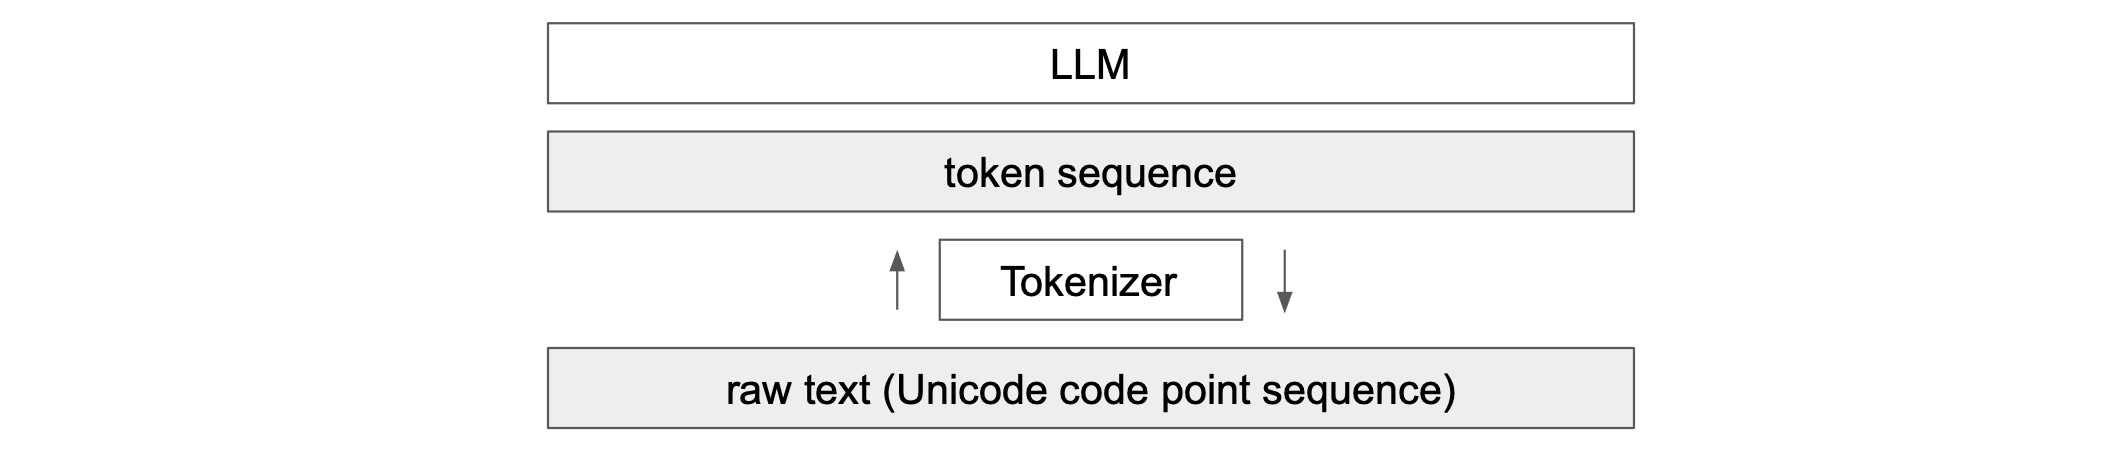

### Jadi mari kita buat encoding dan decoding

Kita akan cuba buat fungsi untuk encoding dan decoding, dan lihat adakah kita mendapat result yang konsisten

In [13]:
#kita dah ada satu list, dictionary semua merge yang kita dah buat
merges

{(97, 110): 256,
 (105, 32): 257,
 (97, 32): 258,
 (101, 110): 259,
 (256, 103): 260,
 (101, 114): 261,
 (256, 32): 262,
 (97, 114): 263,
 (97, 108): 264,
 (97, 109): 265,
 (46, 32): 266,
 (260, 32): 267,
 (116, 117): 268,
 (32, 100): 269,
 (110, 121): 270,
 (97, 104): 271,
 (259, 103): 272,
 (97, 116): 273,
 (97, 107): 274,
 (32, 109): 275}

In [14]:
#list ini yang kita akan gunakan untuk encode dan decode teks kita
#fungsi encode

def encode(text):
  # given a string, return list of integers (the tokens)
  tokens = list(text.encode("utf-8"))
  while len(tokens) >= 2:
    stats = get_stats(tokens)
    pair = min(stats, key=lambda p: merges.get(p, float("inf")))
    if pair not in merges:
      break # nothing else can be merged
    idx = merges[pair]
    tokens = merge(tokens, pair, idx)
  return tokens


#fungsi decode
vocab = {idx: bytes([idx]) for idx in range(256)}
for (p0, p1), idx in merges.items():
    vocab[idx] = vocab[p0] + vocab[p1]

def decode(ids):
  # given ids (list of integers), return Python string
  tokens = b"".join(vocab[idx] for idx in ids)
  text = tokens.decode("utf-8", errors="replace")
  return text


In [17]:
print(decode(encode("Hello world")))

Hello world


In [19]:
text2 = decode(encode(teks))
print(text2 == teks)

True


In [20]:
valtext = "Many common characters, including numerals, punctuation, and other symbols, are unified within the standard and are not treated as specific to any given writing system. Unicode encodes thousands of emoji, with the continued development thereof conducted by the Consortium as a part of the standard.[4] Moreover, the widespread adoption of Unicode was in large part responsible for the initial popularization of emoji outside of Japan. Unicode is ultimately capable of encoding more than 1.1 million characters."
valtext2 = decode(encode(valtext))
print(valtext2 == valtext)

True


Nampaknya percubaan kita berjaya. BPE kita dah terbukti berjaya mengurangkan saiz teks yang perlu diproses.

## Mari kita perbaiki lagi tokenizer kita, mengikut cara GPT (menggunakan REGEX)

In [21]:
import regex as re
gpt2pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")

print(re.findall(gpt2pat, "Hello've world123 how's are you!!!?"))

['Hello', "'ve", ' world', '123', ' how', "'s", ' are', ' you', '!!!?']


In [22]:
example = """
for i in range(1, 101):
    if i % 3 == 0 and i % 5 == 0:
        print("FizzBuzz")
    elif i % 3 == 0:
        print("Fizz")
    elif i % 5 == 0:
        print("Buzz")
    else:
        print(i)
"""
print(re.findall(gpt2pat, example))

['\n', 'for', ' i', ' in', ' range', '(', '1', ',', ' 101', '):', '\n   ', ' if', ' i', ' %', ' 3', ' ==', ' 0', ' and', ' i', ' %', ' 5', ' ==', ' 0', ':', '\n       ', ' print', '("', 'FizzBuzz', '")', '\n   ', ' elif', ' i', ' %', ' 3', ' ==', ' 0', ':', '\n       ', ' print', '("', 'Fizz', '")', '\n   ', ' elif', ' i', ' %', ' 5', ' ==', ' 0', ':', '\n       ', ' print', '("', 'Buzz', '")', '\n   ', ' else', ':', '\n       ', ' print', '(', 'i', ')', '\n']


Boleh nampak dengan menggunakan regex, kita boleh memperbaiki tokenizer kita, dengan mengasing tanda nama, seperti noktah, tanda seru dan tanda soal. Perhatikan juga yang pattern refexnye ini menggunakan apostrophe, jadi mungkin tak sesuai untuk bahasa melayu. Mungkinlah
